### Simplifying multidimensional data

A quick example with toy data

Bad example - need to re-do with one with a bit more strucutre

Let's return to the plant terpene dataset from last week and see if PCA helps understand the variation there.

In [1]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [77]:
df = pd.read_csv('../Datasets/TPS.csv')
df.head(3)

,Gene,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,Female.flower.B.conchifolia.rep1,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,Female.flower.B.conchifolia.rep2,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,Female.flower.B.conchifolia.rep3,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


Tidy up as we did before and split the dataframe into dependant and independant.   

In [78]:
new = df["Gene"].str.split(".B.|.rep", n = 2, expand = True)
# Dropping old Name columns
df.drop(columns =["Gene"], inplace = True)
df.insert(0,'Tissue', new[0] )
df.insert(0,'Species', new[1] )
df.insert(0,'Rep', new[2] )

X = df.loc[:, "Bcon1019-0.0_TPS-bc3":]  # gathers ALL the gene columns, independent variables data
Y = df.loc[:, "Rep":"Tissue"]  # Gathers the 3 columsn of dependent variable data

In [79]:
Y.head(3)

,Rep,Species,Tissue
0,1,conchifolia,Female.flower
1,2,conchifolia,Female.flower
2,3,conchifolia,Female.flower


In [18]:
X.head(3)

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,67.311275,0.0,15.645225,0.660818,0,0.0,0,0.0,0,140.151858,...,0,22.447206,0,0,0.188740,1.391640,3.125789,0.0,0.940281,0
1,24.881496,0.0,3.396060,0.000000,0,0.0,0,0.0,0,168.266137,...,0,13.809320,0,0,0.000000,0.964168,1.100803,0.0,0.000000,0
2,0.000000,0.0,4.865841,0.101612,0,0.0,0,0.0,0,178.561685,...,0,3.518609,0,0,0.437499,0.910456,0.333213,0.0,0.000000,0


In [24]:
X.columns

Index(['Bcon1019-0.0_TPS-bc3', 'Bcon1019-0.2_TPS-bc3',
       'Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein',
       'Bcon1055-2.10_TPS-bc3', 'Bcon1055-3.1_TPS-bc3',
       'Bcon1055-3.14_TPS-bc3', 'Bcon1055-3.3_TPS-bc3', 'Bcon1055-5.2_TPS-bc3',
       'Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase',
       'Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase',
       ...
       'Bcon983-0.7_TPS-bc2', 'Bcon983-1.18_TPS-bc2', 'Bcon983-1.31_TPS-bc2',
       'Bcon983-1.38_TPS-bc2', 'Bcon983-1.6_TPS-bc2', 'Bcon983-1.7_TPS-bc2',
       'Bcon995-0.5_TPS-bc3', 'Bcon995-0.6_TPS-bc3', 'Bcon995-0.7_TPS-bc3',
       'Bcon1049-2.11_Geranyl diphosphate synthase'],
      dtype='object', length=102)

You must normalise the data beforedoing a PCA, but this data is already partially normalised.  It is Transcripts per Millions, so the measures for all the parameters are comparable.  However we will standardise this to give a mean of 0 and sd of 1 to the TPM for all genes.


In [47]:
from sklearn.preprocessing import StandardScaler
Z = StandardScaler().fit_transform(X) 

In [48]:
Z.shape

(36, 102)

This is a numpy array.  We can make it back into a dataframe and add column headers to see how the values have changed.

In [49]:
stand_X = pd.DataFrame(Z,
             columns=X.columns)

In [50]:
stand_X.head(3)

,Bcon1019-0.0_TPS-bc3,Bcon1019-0.2_TPS-bc3,Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,Bcon1055-2.10_TPS-bc3,Bcon1055-3.1_TPS-bc3,Bcon1055-3.14_TPS-bc3,Bcon1055-3.3_TPS-bc3,Bcon1055-5.2_TPS-bc3,Bcon1065-0.18_1-deoxy-D-xylulose 5-phosphate reductoisomerase,Bcon109-3.8_3-hydroxy-3-methylglutaryl coenzyme A reductase,...,Bcon983-0.7_TPS-bc2,Bcon983-1.18_TPS-bc2,Bcon983-1.31_TPS-bc2,Bcon983-1.38_TPS-bc2,Bcon983-1.6_TPS-bc2,Bcon983-1.7_TPS-bc2,Bcon995-0.5_TPS-bc3,Bcon995-0.6_TPS-bc3,Bcon995-0.7_TPS-bc3,Bcon1049-2.11_Geranyl diphosphate synthase
0,0.122636,-0.61244,1.965670,0.127997,0.0,-0.469229,0.0,-0.667404,0.0,-0.274771,...,0.0,0.923781,0.0,0.0,-0.330156,-0.134196,-0.225193,-0.264469,-0.281461,0.0
1,-0.172084,-0.61244,-1.574849,-0.556008,0.0,-0.469229,0.0,-0.667404,0.0,-0.000297,...,0.0,0.418955,0.0,0.0,-0.387127,-0.325848,-0.335993,-0.264469,-0.330397,0.0
2,-0.344913,-0.61244,-1.150021,-0.450831,0.0,-0.469229,0.0,-0.667404,0.0,0.100217,...,0.0,-0.182468,0.0,0.0,-0.255068,-0.349929,-0.377992,-0.264469,-0.330397,0.0


We can reduce this dataframe to 10 instead of 102 values per sample using PCA

In [52]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=10)
 
pca_features = pca.fit_transform(stand_X)

In [53]:
print('Shape before PCA: ', stand_X.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (36, 102)
Shape after PCA:  (36, 10)


In [80]:
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10'])


In [73]:
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.976974,3.185635,-0.352406,-1.481022,0.538145,3.367364,0.914611,-1.185061,1.613960,0.372940
1,-1.935266,1.755464,0.793632,-1.310096,1.020663,-0.935524,0.289524,-0.151314,1.970179,-0.695924
2,-1.949342,2.126054,0.868043,-1.148039,0.539276,-0.772033,-0.156413,-0.696205,2.038374,-0.832186


How much varience is explained by each PCA?

In [57]:
pca.explained_variance_

array([13.87750162,  8.1078115 ,  6.8524372 ,  6.20166385,  5.20323041,
        4.40975303,  3.3614472 ,  3.10389669,  2.76667607,  2.30491954])

This is usually showen by a scree-plot

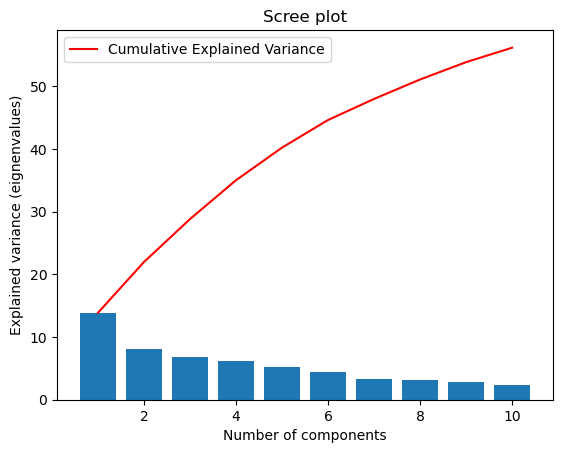

In [58]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

We have a complex dataframe, even 10 parameters does not cover more than 50% of the variation there.

We can plot the first two PCA (covering about 20% of the variation) to see if the species and tissues are separate.  We need to add back the labels.

In [81]:
Y.head(3)

,Rep,Species,Tissue
0,1,conchifolia,Female.flower
1,2,conchifolia,Female.flower
2,3,conchifolia,Female.flower


In [82]:
pca_df['Species'] = Y['Species']
pca_df['Tissue'] = Y['Tissue']

 
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Species,Tissue
0,-1.976974,3.185635,-0.352406,-1.481022,0.538145,3.367364,0.914611,-1.185061,1.613960,0.372940,conchifolia,Female.flower
1,-1.935266,1.755464,0.793632,-1.310096,1.020663,-0.935524,0.289524,-0.151314,1.970179,-0.695924,conchifolia,Female.flower
2,-1.949342,2.126054,0.868043,-1.148039,0.539276,-0.772033,-0.156413,-0.696205,2.038374,-0.832186,conchifolia,Female.flower


And plot as scatterplot in seaborn

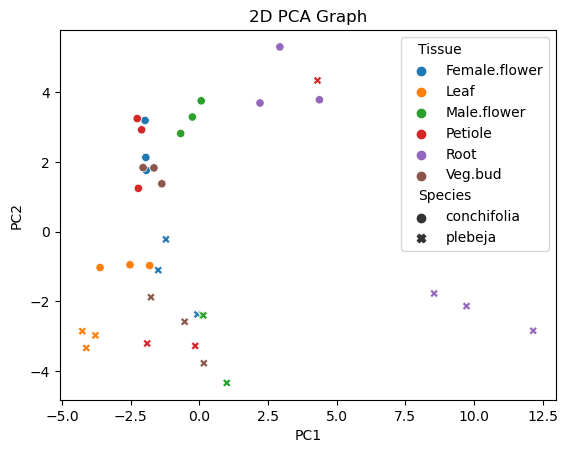

In [88]:
sns.scatterplot(x='PC1', 
                y='PC2',
                hue="Tissue",
                style="Species",
                data=pca_df)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('2D PCA Graph')
plt.show()

Pretty good separation of the species except for one point.  One replicate of the B. plebeja petioles looks alot like the terpene profile of a B. conchifolia root.  Is this seen in the other PC plots?  We have to move the legend out of the plot here.

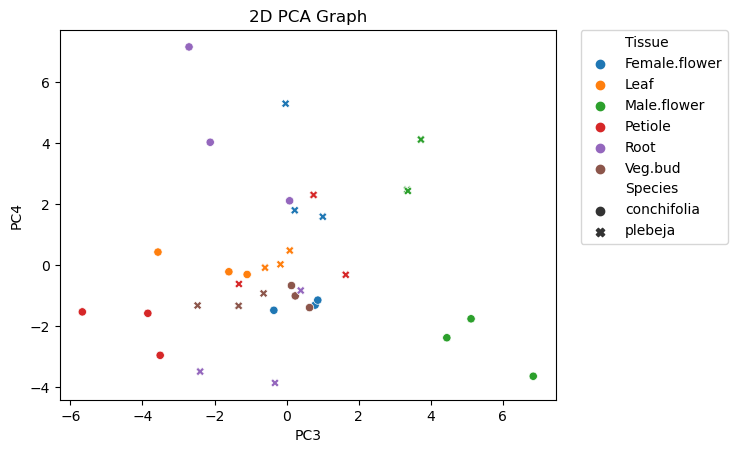

In [91]:
sns.scatterplot(x='PC3', 
                y='PC4',
                hue="Tissue",
                style="Species",
                data=pca_df)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title('2D PCA Graph')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Species not so well separated here.

How can we tell which favtors are leading to the B.plebeja petiolia amongst the B. conchifolia roots?  We need to look at the loadings.  This is the contribution of each parameter to each PC.

In [92]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_

In [93]:
genes = list(X.columns)

In [94]:
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

In [95]:
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['gene_names'] = genes
loadings_df = loadings_df.set_index('gene_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
gene_names,,,,,,,,,,
Bcon1019-0.0_TPS-bc3,3.938527e-02,1.039040e-01,2.300710e-01,-1.578075e-01,5.135234e-02,7.573167e-02,1.239938e-01,1.530099e-01,-1.051082e-01,1.661152e-01
Bcon1019-0.2_TPS-bc3,1.719277e-01,-2.074054e-01,4.363139e-02,2.167110e-02,-1.013537e-01,1.448682e-02,1.431169e-01,3.973436e-02,3.198133e-02,-1.337941e-02
Bcon1029-0.2_Geranylgeranyl pyrophosphate synthase family protein,5.144301e-02,-4.423875e-02,2.222651e-02,2.107647e-02,-7.799023e-02,3.329651e-01,1.826646e-01,7.907330e-03,-2.484858e-01,2.440007e-03
Bcon1055-2.10_TPS-bc3,1.453247e-01,-1.145920e-01,-7.850195e-02,-1.070360e-01,5.989973e-02,7.393348e-02,7.609741e-02,2.569919e-01,1.049878e-01,-9.580129e-02
Bcon1055-3.1_TPS-bc3,-3.940063e-17,2.999873e-17,2.166660e-17,1.724396e-17,-2.326395e-17,-8.786129e-17,-6.555787e-17,-9.169609e-17,-2.611788e-18,4.493479e-17
...,...,...,...,...,...,...,...,...,...,...
Bcon983-1.7_TPS-bc2,4.300251e-02,-6.669354e-02,-5.941765e-02,-1.243503e-01,1.597349e-01,-7.182296e-02,-1.844681e-01,-2.353222e-01,-4.372288e-02,5.647469e-02
Bcon995-0.5_TPS-bc3,2.093937e-01,-2.847496e-02,-8.317882e-02,-8.906699e-02,1.042262e-01,3.013146e-02,-1.730483e-01,-1.246907e-01,-8.885673e-02,3.953953e-02
Bcon995-0.6_TPS-bc3,-1.193336e-02,-6.280986e-02,-2.269673e-02,-2.163153e-02,-5.854778e-02,-1.324675e-01,-1.609362e-01,2.396682e-01,3.039366e-02,-3.095186e-02


What the the big players for PC2 - the PC which pulls the rouge sample to roots?

In [98]:
loadings_df.sort_values(by=['PC2']).head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
gene_names,,,,,,,,,,
Bcon769-1.23_TPS-bc3,-0.016780,-0.255212,0.095211,0.136663,-0.048743,0.003573,0.041992,-0.100628,-0.025140,0.042342
Bcon1176-4.39_TPS-bc1,-0.028599,-0.229385,0.061999,0.094285,-0.108142,0.010741,-0.060617,-0.002725,0.193700,0.176942
Bcon1019-0.2_TPS-bc3,0.171928,-0.207405,0.043631,0.021671,-0.101354,0.014487,0.143117,0.039734,0.031981,-0.013379
Bcon878-1.30_Farnesyl diphosphate synthase,0.014371,-0.196926,0.061385,0.129716,-0.090077,0.182137,0.039316,-0.014350,0.049858,0.027656
Bcon2786-0.9_TPS-bc2,-0.041915,-0.191026,0.131925,0.189992,-0.137298,0.111450,-0.076371,-0.114424,0.062171,0.097075
Bcon1055-5.2_TPS-bc3,0.146527,-0.190473,0.017663,0.064347,-0.116260,-0.080287,0.149481,0.066511,-0.076417,0.072117
Bcon2786-0.11_TPS-bc2,-0.050266,-0.183256,-0.002484,0.015204,-0.190449,-0.127692,-0.130989,0.076188,0.126103,0.166665
Bcon1055-3.14_TPS-bc3,0.173427,-0.162416,-0.060762,-0.136960,-0.047462,-0.104510,0.141412,0.008614,-0.045318,0.019221
Bcon1571-9.28_1-deoxy-D-xylulose 5-phosphate synthase,-0.171730,-0.139951,-0.018972,0.019780,0.084557,0.097312,0.039918,-0.145161,0.136991,0.117765


In [99]:
loadings_df.sort_values(by=['PC2']).tail(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
gene_names,,,,,,,,,,
Bcon1195-2.10_1-deoxy-D-xylulose-5-phosphate synthase,-0.025672,0.123286,0.092712,-0.074471,-0.081662,0.111396,-0.076449,-0.168000,0.236615,0.049584
Bcon1769-0.23_TPS-bc3,0.047558,0.129461,-0.063912,0.231275,0.043714,-0.172813,0.055741,0.088693,-0.052470,0.336058
Bcon2935-0.17_2-C-methyl-D-erythritol 4-phosphate cytidylyltransferase,0.184028,0.136763,0.114603,0.001604,-0.051171,-0.071340,-0.039150,-0.092110,0.156590,-0.053067
Bcon639-0.10_TPS-bc3,0.050466,0.142664,-0.066684,0.231157,0.050786,-0.177611,0.050757,0.076890,-0.051338,0.316793
Bcon983-1.18_TPS-bc2,-0.009434,0.144073,0.248061,-0.142669,0.038330,0.084708,0.087526,0.113799,-0.095831,0.137244
Bcon1294-0.40_4-diphosphocytidyl-2-C-methyl-D-erythritol ki0se,-0.148016,0.166257,0.022091,-0.009815,0.183629,0.087272,0.080650,-0.057929,0.189021,0.124342
Bcon2045-0.18_Hydroxymethylglutaryl-CoA synthase,0.055344,0.192452,0.079682,-0.199438,-0.129475,-0.057550,-0.120046,-0.043774,0.164270,-0.035424
Bcon3625-1.34_TPS-bc1,0.078231,0.214574,-0.100322,0.025976,-0.183181,0.130276,-0.080865,-0.032310,0.106089,-0.004257
Bcon1630-4.18_Mevalo0te ki0se,0.079825,0.260711,0.115420,0.063374,-0.119083,0.117604,-0.120202,-0.025326,0.010899,0.013473


In [101]:
Big_players = ['Bcon769-1.15_TPS-bc3','Bcon1630-4.18_Mevalo0te ki0se', 'Bcon3625-1.34_TPS-bc1', 'Bcon769-1.23_TPS-bc3', 'Bcon1176-4.39_TPS-bc1', 'Bcon1019-0.2_TPS-bc3','Bcon878-1.30_Farnesyl diphosphate synthase']  

In [ ]:
Biplots are graphs that show:

the scaled PCA scatterplots
the loading plots in addition
vectors that show how strongly each feature influences the principal component.

Let's plot the contributison of the strongest PC2 influencers on the PCA plot/

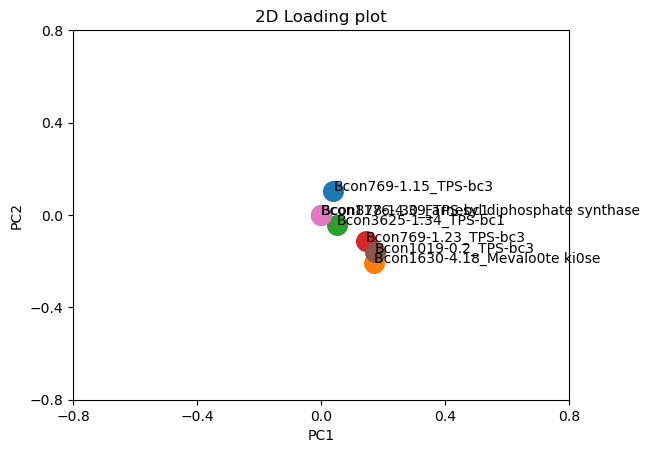

In [102]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(Big_players):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

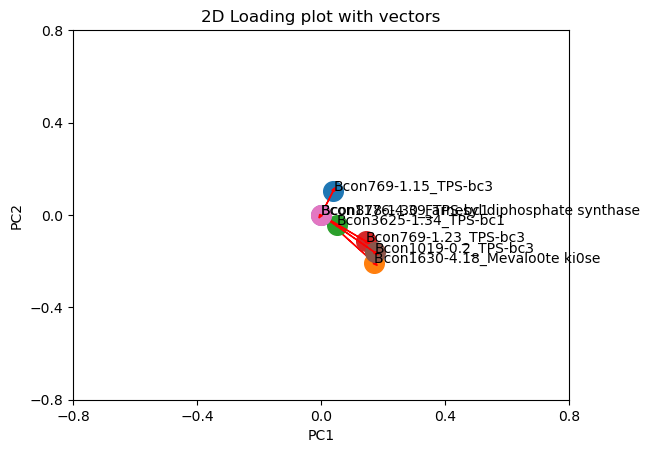

In [103]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(Big_players):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()


In [105]:
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
pca_df_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Species,Tissue
0,-0.120419,0.330795,-0.352406,-1.481022,0.538145,3.367364,0.914611,-1.185061,1.613960,0.372940,conchifolia,Female.flower
1,-0.117878,0.182287,0.793632,-1.310096,1.020663,-0.935524,0.289524,-0.151314,1.970179,-0.695924,conchifolia,Female.flower
2,-0.118736,0.220769,0.868043,-1.148039,0.539276,-0.772033,-0.156413,-0.696205,2.038374,-0.832186,conchifolia,Female.flower
3,-0.220246,-0.107060,-1.094257,-0.307233,2.923176,-0.781391,1.308129,0.699866,-1.962357,-1.592579,conchifolia,Leaf
4,-0.153899,-0.098788,-1.601164,-0.218693,2.840610,-0.121131,-0.297968,2.361071,-0.947291,-1.578157,conchifolia,Leaf
...,...,...,...,...,...,...,...,...,...,...,...,...
31,0.592398,-0.221682,0.395029,-0.832498,-0.808355,0.704168,5.388740,2.730336,4.359251,-1.407501,plebeja,Root
32,0.740395,-0.295146,-2.399190,-3.488489,3.734991,1.661617,-3.578323,-2.815542,-1.884211,2.130702,plebeja,Root
33,-0.107380,-0.195347,-2.469364,-1.323493,-3.224409,-0.575822,-2.346551,3.424158,0.451843,0.579919,plebeja,Veg.bud
34,-0.032632,-0.268389,-0.637059,-0.927746,-2.155124,-3.270765,-3.090948,3.736127,0.446163,-0.229445,plebeja,Veg.bud


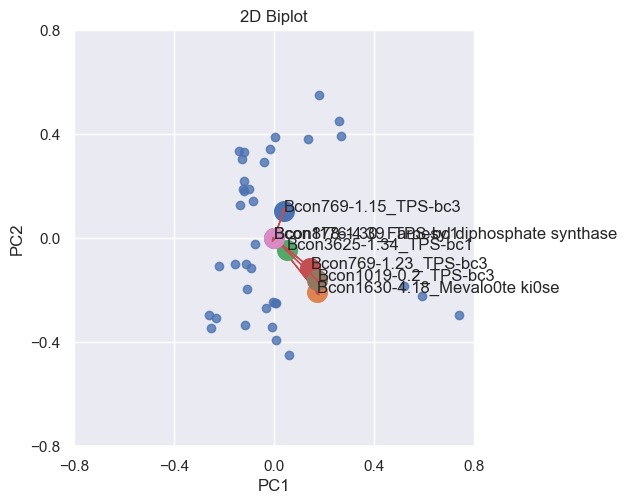

In [106]:
# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )
 
for i, varnames in enumerate(Big_players):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()

In [ ]:
https://plotly.com/python/pca-visualization/

Nice worked through example from cancer genetics here if you want to play more:
    
    https://realpython.com/k-means-clustering-python/#how-to-build-a-k-means-clustering-pipeline-in-python

And if you want ot work form scratch on a populations genetics example:

This dataset has genotying data for microsatellite (short repeats) in the trout genome, for samples form differnt sites and differnt times.  How do the samples vary?

Klutsch, Cornelya et al. (2021), STR data from: Temporal analysis shows relaxed genetic erosion following improved stocking practices in a subarctic transnational brown trout population, Dryad, Dataset, https://doi.org/10.5061/dryad.hx3ffbgf7

https://doi.org/10.1038/s41598-021-96681-1


We used genetic (i.e., 16 short tandem repeats) and morphological (i.e., length and weight) measurements of 593 contemporary and historical brown trout (Salmo trutta) samples to study fine-scale and short-term impacts of different management practices.